<a href="https://colab.research.google.com/github/tatydomi/Machine/blob/main/Modelos_Regressivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression, LogisticRegressionCV,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, log_loss, accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mutual_info_score
from sklearn.datasets import load_digits, load_wine

import warnings
warnings.filterwarnings("ignore")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Nova secção

In [ ]:
# Carregando o dataset
wine = load_wine()

# Convertendo para DataFrame
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['TARGET'] = wine.target


# Nova seção

In [ ]:

df_wine.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

# Carregar os dados
df = pd.read_csv('caminho/para/seu/dataset.csv')  # Substitua pelo caminho correto

# Visualização de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alcohol', y='flavanoids')
plt.title('Relação entre Álcool e Flavonoides')
plt.xlabel('Álcool')
plt.ylabel('Flavonoides')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'caminho/para/seu/dataset.csv'

In [ ]:
df_wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'TARGET'],
      dtype='object')

In [ ]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


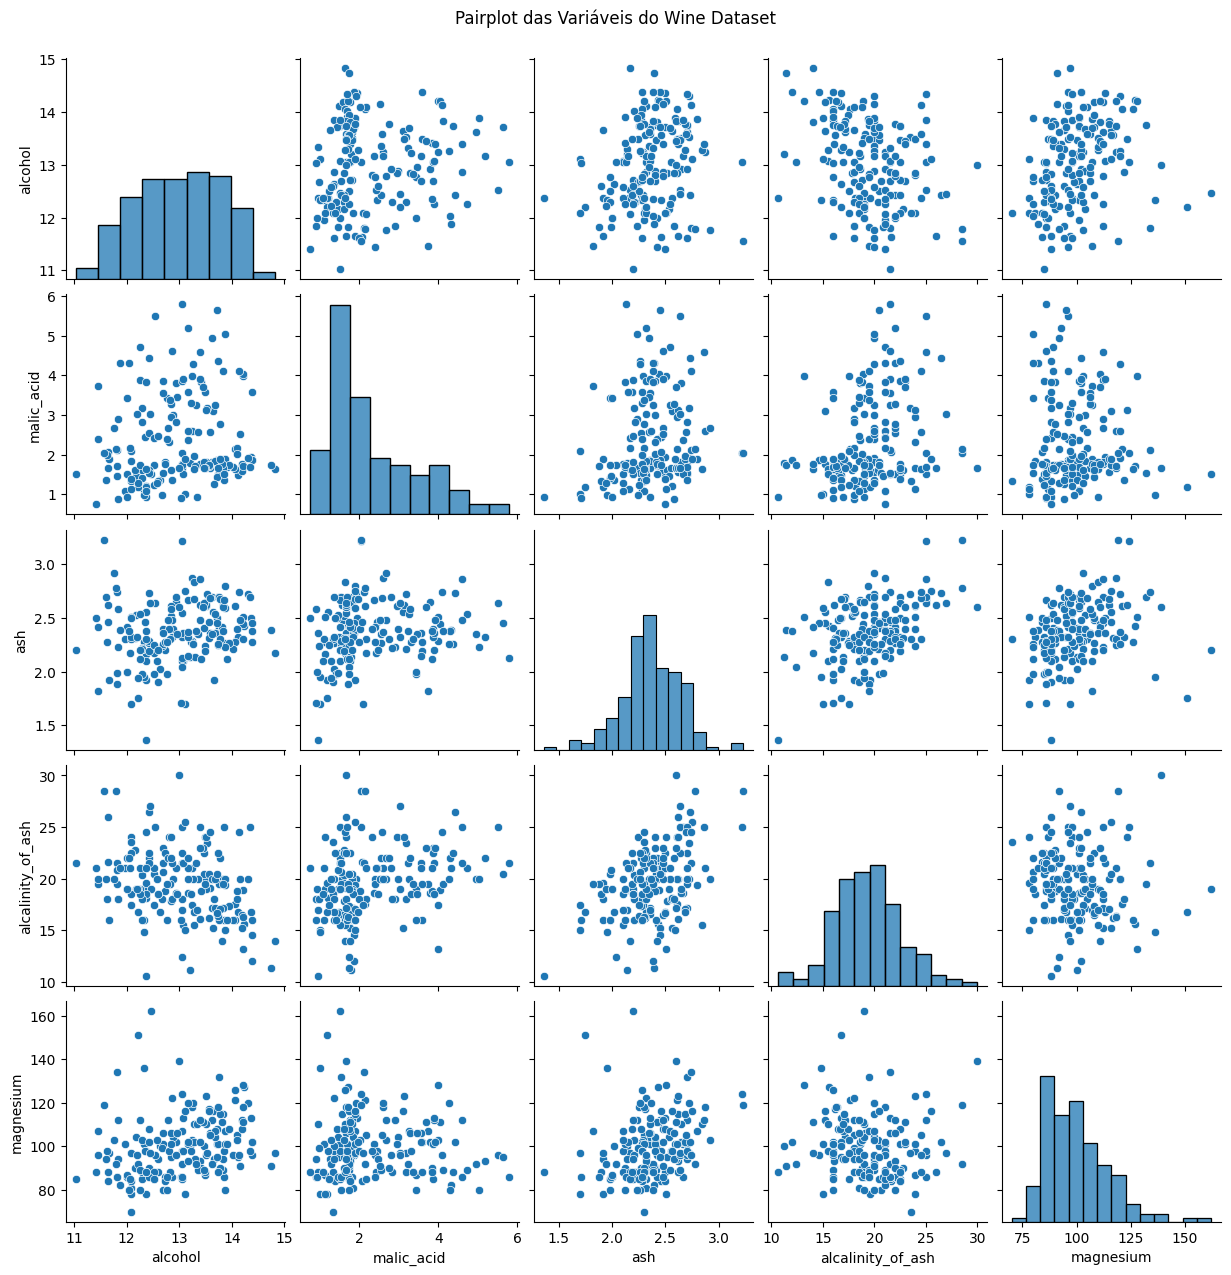

In [ ]:
# Visualização inicial dos dados de Cancer
sns.pairplot(df_wine.iloc[:, 0:5])  # Visualiza as primeiras cinco variáveis para simplificar
plt.suptitle('Pairplot das Variáveis do Wine Dataset', y=1.02)
plt.show()

In [ ]:
def empirical_rule(data):
    mean = np.mean(data)
    std = np.std(data)
    within_1_std = ((data > (mean - std)) & (data < (mean + std))).mean() * 100
    within_2_std = ((data > (mean - 2 * std)) & (data < (mean + 2 * std))).mean() * 100
    within_3_std = ((data > (mean - 3 * std)) & (data < (mean + 3 * std))).mean() * 100
    return within_1_std, within_2_std, within_3_std

def chebyshev_rule(data, k):
    mean = np.mean(data)
    std = np.std(data)
    lower_bound = mean - k * std
    upper_bound = mean + k * std
    within_k_std = ((data > lower_bound) & (data < upper_bound)).mean() * 100
    return within_k_std

In [ ]:
# Análise Empírica
empirical_results = empirical_rule(df_wine['alcohol'])
print(f"Porcentagem de dados dentro de 1 desvio padrão: {empirical_results[0]:.2f}%")
print(f"Porcentagem de dados dentro de 2 desvios padrão: {empirical_results[1]:.2f}%")
print(f"Porcentagem de dados dentro de 3 desvios padrão: {empirical_results[2]:.2f}%")


Porcentagem de dados dentro de 1 desvio padrão: 64.04%
Porcentagem de dados dentro de 2 desvios padrão: 98.31%
Porcentagem de dados dentro de 3 desvios padrão: 100.00%


In [ ]:
# Análise por Teorema de Chebyshev para k = 2 e k = 3
chebyshev_k2 = chebyshev_rule(df_wine['alcohol'], 2)
chebyshev_k3 = chebyshev_rule(df_wine['alcohol'], 3)
print(f"Porcentagem de dados dentro de 2 desvios padrão (Chebyshev): {chebyshev_k2:.2f}%")
print(f"Porcentagem de dados dentro de 3 desvios padrão (Chebyshev): {chebyshev_k3:.2f}%")

Porcentagem de dados dentro de 2 desvios padrão (Chebyshev): 98.31%
Porcentagem de dados dentro de 3 desvios padrão (Chebyshev): 100.00%


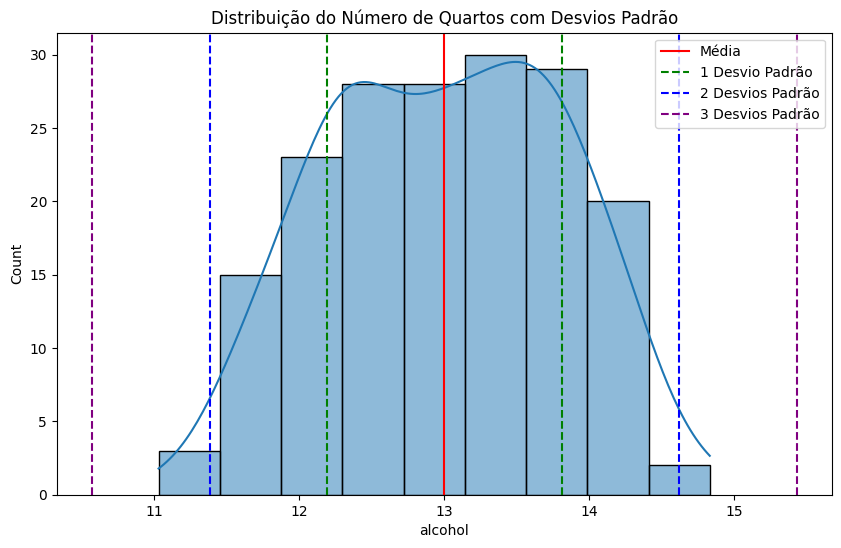

In [ ]:
def plot_data_distribution(data, title):
    mean = np.mean(data)
    std = np.std(data)
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True)
    plt.axvline(x=mean, color='red', label='Média')
    plt.axvline(x=mean + std, color='green', linestyle='--', label='1 Desvio Padrão')
    plt.axvline(x=mean - std, color='green', linestyle='--')
    plt.axvline(x=mean + 2 * std, color='blue', linestyle='--', label='2 Desvios Padrão')
    plt.axvline(x=mean - 2 * std, color='blue', linestyle='--')
    plt.axvline(x=mean + 3 * std, color='purple', linestyle='--', label='3 Desvios Padrão')
    plt.axvline(x=mean - 3 * std, color='purple', linestyle='--')
    plt.title(title)
    plt.legend()
    plt.show()

plot_data_distribution(df_wine['alcohol'], 'Distribuição do Número de Quartos com Desvios Padrão')

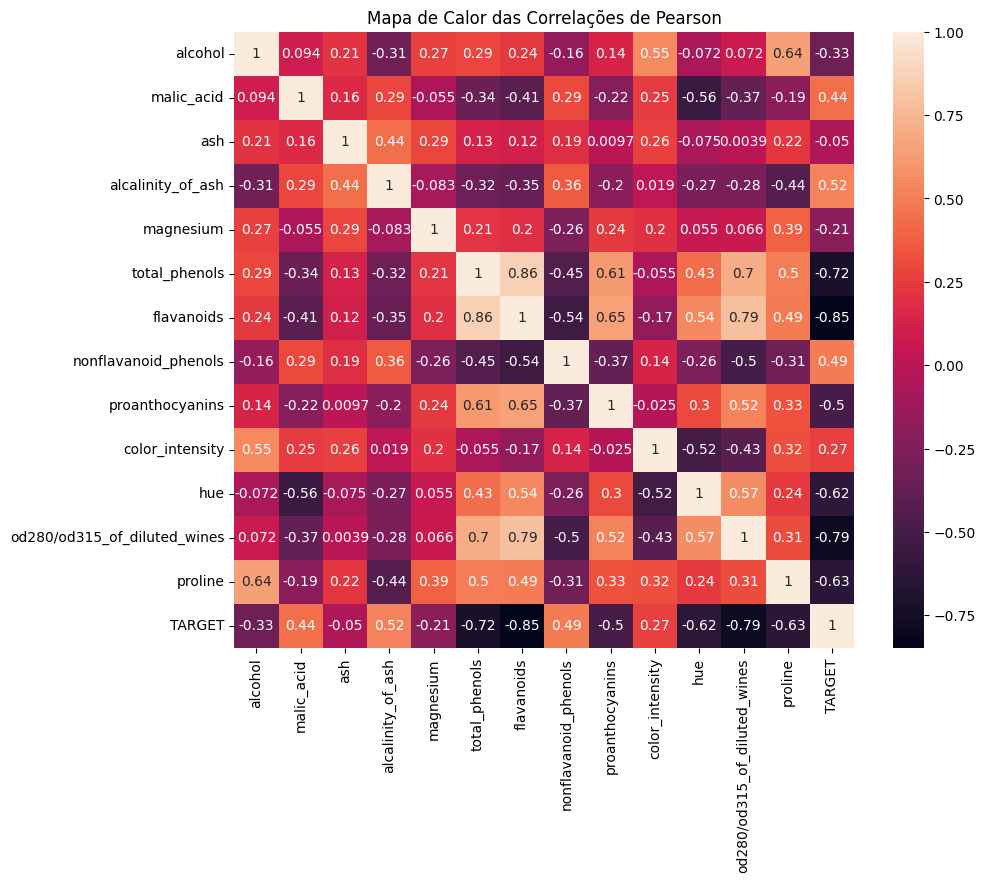

In [ ]:
# Correlações para calif Housing
corr_pearson = df_wine.corr(method='pearson')
corr_spearman = df_wine.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True)
plt.title('Mapa de Calor das Correlações de Pearson')
plt.show()


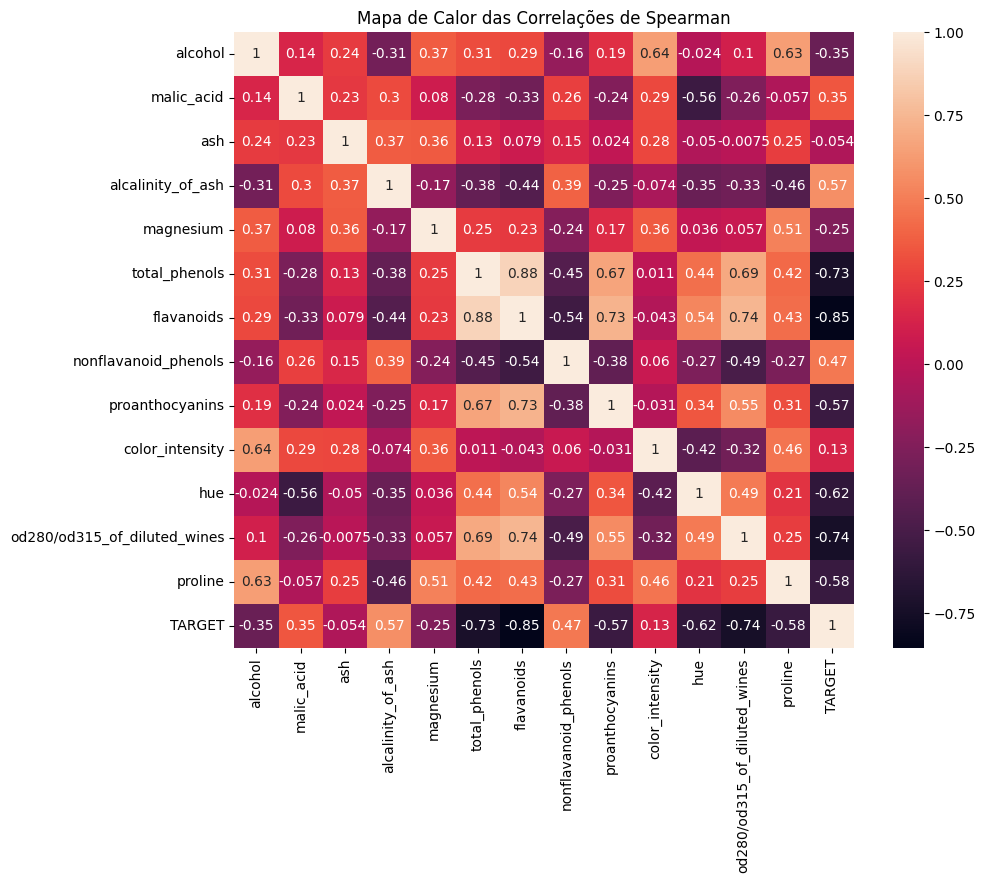

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True)
plt.title('Mapa de Calor das Correlações de Spearman')
plt.show()

In [ ]:
# Informação mútua para Wine Dataset
info_mutua = df_wine.apply(lambda x: mutual_info_score(x, df_wine['TARGET']))
print("Informação mútua entre as variáveis e o target:\n", info_mutua.sort_values(ascending=False))

Informação mútua entre as variáveis e o target:
 TARGET                          1.086038
flavanoids                      0.984792
color_intensity                 0.949669
od280/od315_of_diluted_wines    0.933704
alcohol                         0.929244
proline                         0.902163
malic_acid                      0.890141
total_phenols                   0.818791
proanthocyanins                 0.773655
hue                             0.721841
ash                             0.545049
alcalinity_of_ash               0.510013
magnesium                       0.440947
nonflavanoid_phenols            0.328487
dtype: float64


Coef (A): [[-0.30919495  0.36150539  0.64283202 -0.29063486 -0.0134238   0.2287061
   0.96166102  0.06341497 -0.10514142  0.16142063 -0.08129817  0.36624879
   0.0083003 ]
 [ 0.43492326 -0.62208429 -0.75998116  0.17173069 -0.00172221  0.08401687
   0.20751195  0.12933743  0.62547872 -0.87805835  0.48568061  0.40083556
  -0.0070518 ]
 [-0.12572831  0.2605789   0.11714914  0.11890417  0.01514601 -0.31272296
  -1.16917297 -0.1927524  -0.5203373   0.71663772 -0.40438244 -0.76708435
  -0.00124849]]
Intercept (B): [-0.8257994   1.15394476 -0.32814536]
Coef (A): [[ 1.92584153e-01  1.64431072e-01  1.35360635e-01 -1.80965070e-01
  -1.26965250e-02  1.53747322e-01  3.23739620e-01  8.79151958e-03
   2.90108292e-02  7.10851238e-02  8.96769202e-03  2.13876789e-01
   8.19379472e-03]
 [-3.00128976e-01 -3.42673497e-01 -1.59078483e-01  7.21452467e-02
  -4.35085968e-04  3.47524899e-02  1.36451245e-01 -6.41670241e-03
   1.79656379e-01 -5.62315178e-01  8.46578007e-02  1.26706376e-01
  -5.88281837e-03]
 [ 1

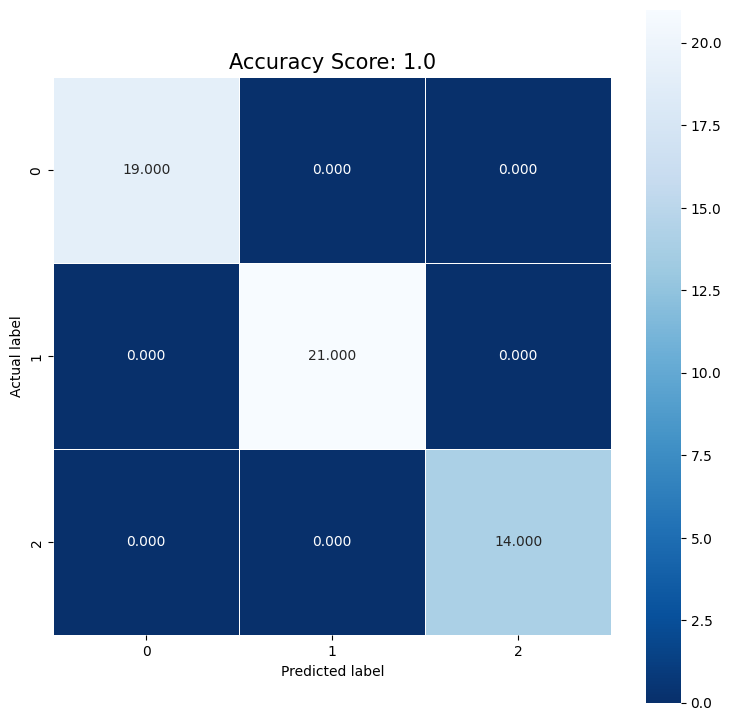

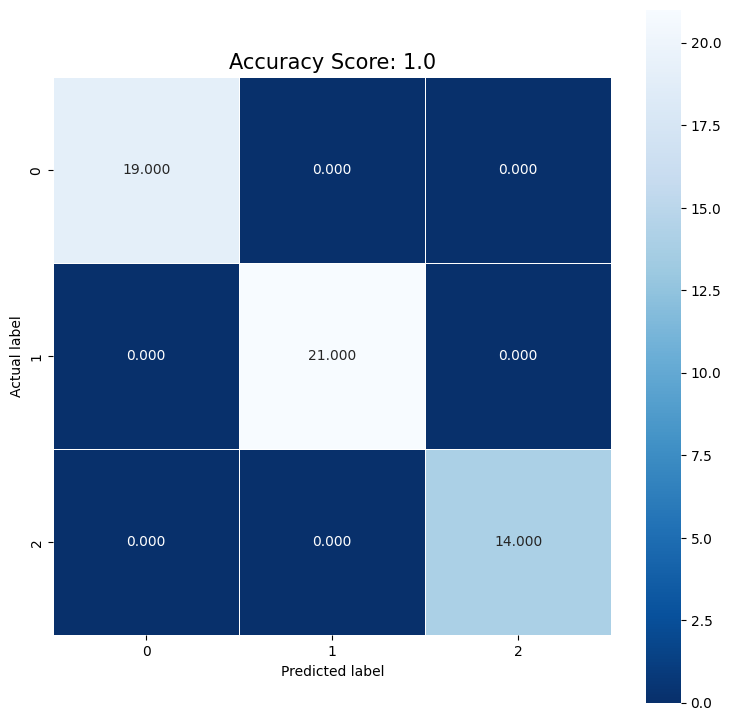

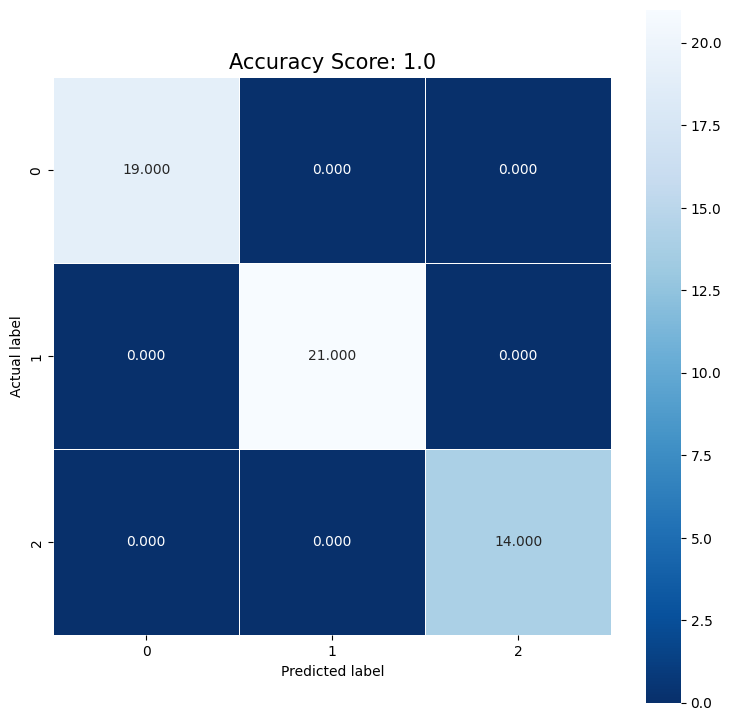

In [ ]:
# Dividindo os dados para regressão
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df_wine.drop('TARGET', axis=1), df_wine['TARGET'], test_size=0.3, random_state=42)

# Modelo de Regressão Logística com variações paramétricas
parameters = [
    {'penalty': 'l2', 'C': 1.0, 'solver': 'lbfgs', 'max_iter': 1000},  # Default parameters
    {'penalty': 'l2', 'C': 0.1, 'solver': 'lbfgs', 'max_iter': 1000},  # Lower regularization
    {'penalty': 'l2', 'C': 10.0, 'solver': 'lbfgs', 'max_iter': 1000}  # Higher regularization
]
results = []

# Avaliando os modelos com diferentes parâmetros
for param in parameters:
    model = LogisticRegression(**param)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    #auc = roc_auc_score(y_test, y_pred_prob)
    #fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    #plt.plot(fpr, tpr, label=f'{param}, AUC: {auc:.2f}')
    #results.append((param, auc))
    cm = confusion_matrix(y_test, predictions)
    score = model.score(X_test, y_test)
    print("Coef (A):", model.coef_)
    print("Intercept (B):", model.intercept_)

    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15)

#plt.plot([0, 1], [0, 1], 'r--')
#plt.title('ROC Curves - Regressão Logística')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.legend()
#plt.show()

# Mostrando os resultados
#print("Resultados da regressão logística com diferentes parâmetros:")
#for res in results:
#    print(f"Parâmetros: {res[0]}, AUC: {res[1]:.2f}")

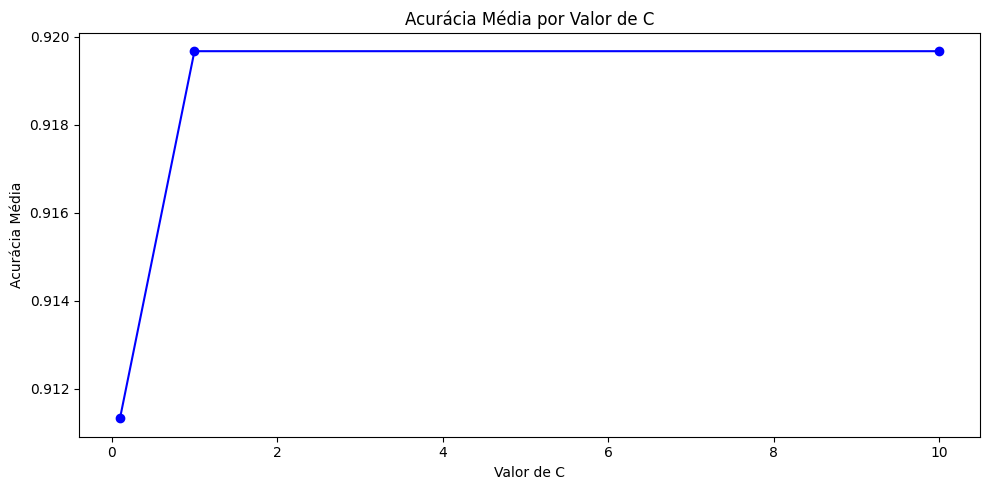

In [ ]:
# Configurações de C para a regressão logística com validação cruzada
C_values = [0.1, 1.0, 10.0]

# Criando o modelo com validação cruzada
model_cv = LogisticRegressionCV(Cs=C_values, cv=5, random_state=42, max_iter=10000)
model_cv.fit(X_train, y_train)

# Coletando médias dos scores da validação cruzada para cada C
mean_accuracy = np.mean(model_cv.scores_[1], axis=0)

# Plotando Acurácia por configuração de C
plt.figure(figsize=(10, 5))
plt.plot(C_values, mean_accuracy, marker='o', linestyle='-', color='blue')
plt.title('Acurácia Média por Valor de C')
plt.xlabel('Valor de C')
plt.ylabel('Acurácia Média')

plt.tight_layout()
plt.show()